***
# <center><font color=blue> I2A2 - Institut d'Intelligence Artificielle Appliquée </font><br><br>Final Challenge

## <center>Aldo Segnini</center>
***

### <center>01/June/2022</center>

### <center>"I am still learning" - Michelangelo at age 87</center>

***
## Table of Content:
* [1. Challenge Description](#first-bullet)
* [2. Business Understanding](#second-bullet)
* [3. Methodoloty](#third-bullet)
* [4. Solution Description](#fourth-bullet)
* [5. Solution Implementation - Jupyter Notebook](#fith-bullet)


***
# 1. Challenge Description

Given the candlestick chart generated by the **TD** ticker (Toronto-Dominion Bank) on the Toronto Stock Exchange (Exchange: **TO**) between **2021-12-01** and **2022-02-01**, to find similar chart pattern in other stocks, in any range of similar time.
<br><br><br>
**Initial information:**
- **Reference Ticker:** TD - Toronto-Dominion Bank, a Canadian multinational banking and financial services corporation headquartered in Toronto, Ontario.
- **Reference Ticker:** TO - Toronto Stock Exchange
- **Start Date:** 2021-12-01
- **End Date:** 2022-02-01

<img src="Desired-Pattern.png"/>

***
# 2. Business Understanding

Source: [Investopedia](https://www.investopedia.com/trading/candlestick-charting-what-is-it/)

Candlestick charts originated in Japan over 100 years before the West developed the bar and point-and-figure charts. In the 1700s, a Japanese man named Homma discovered that, while there was a link between price and the supply and demand of rice, the markets were strongly influenced by the emotions of traders.1

Candlesticks show that emotion by visually representing the size of price moves with different colors. Traders use the candlesticks to make trading decisions based on regularly occurring patterns that help forecast the short-term direction of the price.

#### Candlestick Components

Just like a bar chart, a daily candlestick shows the market's open, high, low, and close price for the day. The candlestick has a wide part, which is called the "real body."

This real body represents the price range between the open and close of that day's trading. When the real body is filled in or black, it means the close was lower than the open. If the real body is empty, it means the close was higher than the open.

<img src="Candlestick.jpg"/>

Just above and below the real body are the "shadows" or "wicks." The shadows show the high and low prices of that day's trading. If the upper shadow on a down candle is short, it indicates that the open that day was near the high of the day.

A short upper shadow on an up day dictates that the close was near the high. The relationship between the days open, high, low, and close determines the look of the daily candlestick. Real bodies can be long or short and black or white. Shadows can be long or short.

Bar charts and candlestick charts show the same information, just in a different way. Candlestick charts are more visual, due to the color coding of the price bars and thicker real bodies, which are better at highlighting the difference between the open and the close.

***
# 3. Methodology

### CRISP-DS
Source: [Magrathea](https://blog.magrathealabs.com/crisp-ds-cyclic-methodology-for-data-science-projects-10c7d00fbc85)

**CRISP-DS** (Cross Industry Standard Process for Data Science), is a cyclic methodology that helps you organize your thoughts and codes in a logical, straightforward way.

<img src="crisp-ds.jpeg" title="CRISP-DS" />

### Phases of CRISP-DS:

**1. Business Problem** - During this phase is important to understand the problem that you are facing, the impact that it may ganerate and the importance to the business.<br>
**2. Business Understanding** - A deep understanding of the business is important to guarantee that the solution provided will generate value to the company. During this phase we translate the business problem to a data problem.<br>
**3. Data Extraction** - At this phase, we’ll gather the available data, check the ways of accessing them, and retrieve the data.<br>
**4. Data Cleaning** - The cleaning phase is important to guarantee the quality of the data that will be used.<br>
**5. EDA** - Exploratory Data Analysis. The most important and extended phase of all in the cycle. Here we will understand what each piece of information describes and how they relate to each other.<br>
**6. Modeling** - Is where you prep the data for the application of Machine Learning Algorithms<br>
**7. Machine Learning Algorithms** - The main idea here is to apply cross-validation techniques, insert the data into the algorithms, and compare the results.<br>
**8. Evaluation** - After applying the data to the algorithms, we must select the appropriate metrics to evaluate the model and choose the best one.<br>
**9. Deployment** - At this moment, we will plan the deployment, make the solution available for usage, and report what you did and learned.

# 4. Solution Description

<img src="pearson.jpg"/>

***
# 5. Solution Implementation - Jupyter Notebook

For this challenge, I am using the file "database.parquet" provided with the information needed to solve the problem.

## 5.1. Importing Libraries and Reading the Dataframe

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install fastparquet
!pip install yfinance

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 8.0 MB/s 
     |████████████████████████████████| 1.6 MB 46.8 MB/s 
     |████████████████████████████████| 140 kB 73.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 10.0 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from fastparquet import ParquetFile
import yfinance as yf
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.preprocessing import normalize
import warnings

sns.set_theme()

In [3]:
# Importing the dataframe from computer
dtf_full = ParquetFile('/content/drive/MyDrive/Colab Notebooks/I2A2/database.parquet').to_pandas()
dtf_full['Ticker_Exchange'] = dtf_full['Ticker'] + '_' + dtf_full['Exchange']
dtf_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Exchange,Ticker_Exchange
0,2008-09-02,25.100143,25.536482,24.527897,24.670959,22.517595,2876665.0,A,NYSE,A_NYSE
1,2008-09-03,24.570814,24.678112,23.862661,24.184549,22.073639,3855265.0,A,NYSE,A_NYSE
2,2008-09-04,23.977110,23.984262,22.989986,23.018599,21.009457,3656609.0,A,NYSE,A_NYSE
3,2008-09-05,22.889843,23.547926,22.711016,23.454935,21.407715,3217357.0,A,NYSE,A_NYSE
4,2008-09-08,23.876966,23.977110,23.297567,23.583691,21.525227,3046102.0,A,NYSE,A_NYSE


## 5.2. Understanding the data

In [4]:
dtf_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17312562 entries, 0 to 17312561
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Date             datetime64[ns]
 1   Open             float64       
 2   High             float64       
 3   Low              float64       
 4   Close            float64       
 5   Adj Close        float64       
 6   Volume           float64       
 7   Ticker           object        
 8   Exchange         object        
 9   Ticker_Exchange  object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 1.3+ GB


In [5]:
initialDate = datetime.strptime('2021-12-01', '%Y-%m-%d')
endDate = datetime.strptime('2022-02-01', '%Y-%m-%d')

# Printing date range
print('Entire Dataframe - Initial Date:', dtf_full['Date'].min().date(),
      ' / End Date:', dtf_full['Date'].max().date())

print('Number of days:', (dtf_full['Date'].max() - dtf_full['Date'].min()).days)

# Printing the total of days of the pattern
print('Pattern Period: Number of days:', (endDate - initialDate).days)

Entire Dataframe - Initial Date: 2008-09-02  / End Date: 2022-03-28
Number of days: 4955
Pattern Period: Number of days: 62


In [6]:
# re-name field from 'Adj Close' to 'Adj_Close'
dtf_full = dtf_full.rename(columns={"Adj Close": "Adj_Close"})

In [7]:
period = (dtf_full['Date'] >= initialDate) & (dtf_full['Date'] <= endDate)
dtf_period = dtf_full[period]
dtf_period

,Date,Open,High,Low,Close,Adj_Close,Volume,Ticker,Exchange,Ticker_Exchange
3336,2021-12-01,151.119995,152.850006,148.089996,148.210007,148.015060,1800900.0,A,NYSE,A_NYSE
3337,2021-12-02,147.910004,152.470001,147.729996,150.990005,150.791397,1514100.0,A,NYSE,A_NYSE
3338,2021-12-03,151.820007,153.000000,147.720001,149.330002,149.133575,1412600.0,A,NYSE,A_NYSE
3339,2021-12-06,149.339996,152.039993,147.779999,151.470001,151.270767,1803400.0,A,NYSE,A_NYSE
3340,2021-12-07,152.839996,156.240005,152.610001,153.800003,153.597702,1422700.0,A,NYSE,A_NYSE
...,...,...,...,...,...,...,...,...,...,...
17312519,2022-01-26,28.160000,28.200001,27.809999,27.900000,27.900000,4800.0,ZZZD,TO,ZZZD_TO
17312520,2022-01-27,28.000000,28.059999,27.889999,27.920000,27.920000,2200.0,ZZZD,TO,ZZZD_TO
17312521,2022-01-28,27.889999,28.000000,27.799999,28.000000,28.000000,1500.0,ZZZD,TO,ZZZD_TO
17312522,2022-01-31,28.100000,28.270000,28.100000,28.260000,28.260000,6000.0,ZZZD,TO,ZZZD_TO


In [8]:
dtf_period[dtf_period['Ticker_Exchange']=='TD_TO']

,Date,Open,High,Low,Close,Adj_Close,Volume,Ticker,Exchange,Ticker_Exchange
14708267,2021-12-01,92.199997,93.839996,91.949997,91.980003,91.165939,4237700.0,TD,TO,TD_TO
14708268,2021-12-02,93.839996,96.750000,93.370003,96.500000,95.645927,6046700.0,TD,TO,TD_TO
14708269,2021-12-03,96.180000,96.290001,95.250000,95.589996,94.743980,4197900.0,TD,TO,TD_TO
14708270,2021-12-06,96.000000,96.260002,94.389999,94.449997,93.614075,3536400.0,TD,TO,TD_TO
14708271,2021-12-07,94.750000,95.389999,94.739998,94.900002,94.060097,3691300.0,TD,TO,TD_TO
14708272,2021-12-08,95.150002,95.660004,94.830002,95.449997,94.605225,3650000.0,TD,TO,TD_TO
14708273,2021-12-09,95.050003,95.559998,94.750000,95.440002,94.595314,2784600.0,TD,TO,TD_TO
14708274,2021-12-10,95.620003,95.900002,95.150002,95.330002,94.486290,6767500.0,TD,TO,TD_TO
14708275,2021-12-13,95.379997,95.500000,94.570000,95.089996,94.248405,7536200.0,TD,TO,TD_TO
14708276,2021-12-14,94.800003,95.870003,94.589996,94.750000,93.911423,3544200.0,TD,TO,TD_TO


In [9]:
df = dtf_period[dtf_period['Ticker_Exchange'] == 'TD_TO']

df = df.set_index('Date')

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.update_layout(title='Toronto-Dominion Bank - TO - Desired Pattern',
                  xaxis_title='Date',
                  hovermode='x')
fig.show()

In [10]:
print('Number of days with data:', len(dtf_period[dtf_period['Ticker_Exchange']=='TD_TO']))

Number of days with data: 42


In [11]:
print(dtf_full.Exchange.unique())

['NYSE' 'TO' 'NASDAQ' 'AMEX']


In [12]:
print(dtf_full.Ticker.unique())

['A' 'AA' 'AAB' ... 'ZYXI' 'ZZZ' 'ZZZD']


In [13]:
print('Number of combinations Ticker + Exchange', dtf_period['Ticker_Exchange'].nunique())

tickers_exchange = dtf_period['Ticker_Exchange'].unique()

print(tickers_exchange)

Number of combinations Ticker + Exchange 8909
['A_NYSE' 'AA_NYSE' 'AAB_TO' ... 'ZYXI_NASDAQ' 'ZZZ_TO' 'ZZZD_TO']


***
# 5.3. Data Cleaning

## 5.3.1. Preparing and Cleanning the Data

In [14]:
# Normlalizing data
#!jupyter nbextension enable --py widgetsnbextension

import time
from tqdm.notebook import tqdm, trange

columns=(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'])

for col in tqdm(columns):
    dtf_period[col] = (dtf_period[col]-dtf_period[col].min()) / (dtf_period[col].max()-dtf_period[col].min())

dtf_period

  0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Adj_Close,Volume,Ticker,Exchange,Ticker_Exchange
3336,2021-12-01,0.025278,0.025546,0.025165,0.024867,0.024866,0.005493,A,NYSE,A_NYSE
3337,2021-12-02,0.024741,0.025483,0.025103,0.025333,0.025332,0.004618,A,NYSE,A_NYSE
3338,2021-12-03,0.025395,0.025572,0.025102,0.025055,0.025054,0.004309,A,NYSE,A_NYSE
3339,2021-12-06,0.024980,0.025411,0.025112,0.025414,0.025412,0.005501,A,NYSE,A_NYSE
3340,2021-12-07,0.025565,0.026113,0.025933,0.025805,0.025803,0.004340,A,NYSE,A_NYSE
...,...,...,...,...,...,...,...,...,...,...
17312519,2022-01-26,0.004708,0.004710,0.004723,0.004678,0.004711,0.000015,ZZZD,TO,ZZZD_TO
17312520,2022-01-27,0.004681,0.004687,0.004737,0.004682,0.004714,0.000007,ZZZD,TO,ZZZD_TO
17312521,2022-01-28,0.004662,0.004677,0.004721,0.004695,0.004727,0.000005,ZZZD,TO,ZZZD_TO
17312522,2022-01-31,0.004698,0.004722,0.004772,0.004739,0.004771,0.000018,ZZZD,TO,ZZZD_TO


## 5.3.2. Keeping only essential data in the dataframe

In [15]:
df_clean = dtf_period.filter(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Ticker_Exchange'], axis=1)
df_clean.reset_index(inplace=True)
df_clean

,index,Date,Open,High,Low,Close,Adj_Close,Volume,Ticker_Exchange
0,3336,2021-12-01,0.025278,0.025546,0.025165,0.024867,0.024866,0.005493,A_NYSE
1,3337,2021-12-02,0.024741,0.025483,0.025103,0.025333,0.025332,0.004618,A_NYSE
2,3338,2021-12-03,0.025395,0.025572,0.025102,0.025055,0.025054,0.004309,A_NYSE
3,3339,2021-12-06,0.024980,0.025411,0.025112,0.025414,0.025412,0.005501,A_NYSE
4,3340,2021-12-07,0.025565,0.026113,0.025933,0.025805,0.025803,0.004340,A_NYSE
...,...,...,...,...,...,...,...,...,...
376396,17312519,2022-01-26,0.004708,0.004710,0.004723,0.004678,0.004711,0.000015,ZZZD_TO
376397,17312520,2022-01-27,0.004681,0.004687,0.004737,0.004682,0.004714,0.000007,ZZZD_TO
376398,17312521,2022-01-28,0.004662,0.004677,0.004721,0.004695,0.004727,0.000005,ZZZD_TO
376399,17312522,2022-01-31,0.004698,0.004722,0.004772,0.004739,0.004771,0.000018,ZZZD_TO


## 5.3.3. Analysing the new dataframe

In [16]:
df_clean.isnull().sum()

index              0
Date               0
Open               0
High               0
Low                0
Close              0
Adj_Close          0
Volume             0
Ticker_Exchange    0
dtype: int64

In [17]:
df_clean[df_clean['Ticker_Exchange'] == 'TD_TO']

,index,Date,Open,High,Low,Close,Adj_Close,Volume,Ticker_Exchange
320902,14708267,2021-12-01,0.015421,0.015683,0.015624,0.015431,0.015327,0.012926,TD_TO
320903,14708268,2021-12-02,0.015695,0.016169,0.015865,0.016190,0.016078,0.018444,TD_TO
320904,14708269,2021-12-03,0.016087,0.016092,0.016184,0.016037,0.015927,0.012805,TD_TO
320905,14708270,2021-12-06,0.016057,0.016087,0.016038,0.015846,0.015737,0.010787,TD_TO
320906,14708271,2021-12-07,0.015848,0.015942,0.016098,0.015921,0.015812,0.011259,TD_TO
320907,14708272,2021-12-08,0.015914,0.015987,0.016113,0.016014,0.015904,0.011133,TD_TO
320908,14708273,2021-12-09,0.015898,0.015970,0.016099,0.016012,0.015902,0.008494,TD_TO
320909,14708274,2021-12-10,0.015993,0.016027,0.016167,0.015993,0.015884,0.020643,TD_TO
320910,14708275,2021-12-13,0.015953,0.015960,0.016069,0.015953,0.015844,0.022987,TD_TO
320911,14708276,2021-12-14,0.015856,0.016022,0.016072,0.015896,0.015787,0.010811,TD_TO


In [18]:
tickers_sample = df_clean['Ticker_Exchange'].unique()
len_ticker = len(tickers_sample)
len_ticker

8909

***
# 5.4. Exploratory Data Analysis

### Understanding the correlation using one variable

## 6.1. Analyzing the correlation using <bold><font color=red>"Open"</font></bold> values

In [19]:
df_open = pd.DataFrame()
column = 'Open'

for ticker_ in tqdm(tickers_sample):
    df_open[ticker_] = (df_clean.loc[df_clean['Ticker_Exchange'] == ticker_, column]).reset_index(drop=True)
    
df_open.head(100)

  0%|          | 0/8909 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



,A_NYSE,AA_NYSE,AAB_TO,AAC_NYSE,AACG_NASDAQ,AACI_NASDAQ,AADI_NASDAQ,AAIC_NYSE,AAIN_NYSE,AAL_NASDAQ,...,ZWS_TO,ZWT_TO,ZWU_TO,ZXM_TO,ZY_NASDAQ,ZYME_NYSE,ZYNE_NASDAQ,ZYXI_NASDAQ,ZZZ_TO,ZZZD_TO
0,0.025278,0.008008,0.000018,0.001633,0.000281,0.001649,0.003557,0.000609,0.004171,0.002998,...,0.003622,0.006033,0.002079,0.007153,0.001549,0.003371,0.000581,0.001980,0.006270,0.004639
1,0.024741,0.007430,0.000018,0.001636,0.000266,0.001633,0.003327,0.000596,0.004166,0.002755,...,0.003547,0.005852,0.002061,0.007117,0.001424,0.003393,0.000550,0.001948,0.006138,0.004622
2,0.025395,0.007485,0.000018,0.001633,0.000259,0.001631,0.003381,0.000609,0.004171,0.002886,...,0.003600,0.005879,0.002078,0.007115,0.001455,0.003393,0.000555,0.001907,0.006223,0.004637
3,0.024980,0.007511,0.000018,0.001634,0.000209,0.001631,0.003235,0.000606,0.004145,0.002832,...,0.003612,0.005802,0.002088,0.007053,0.001283,0.003048,0.000530,0.001788,0.006165,0.004626
4,0.025565,0.007871,0.000020,0.001634,0.000228,0.001633,0.003486,0.000612,0.004139,0.003061,...,0.003654,0.005954,0.002108,0.007178,0.001409,0.003076,0.000554,0.001887,0.006299,0.004624


In [20]:
first_column = df_open.pop('TD_TO')
df_open.insert(0, 'TD_TO', first_column)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [21]:
df_open.tail()

,TD_TO,A_NYSE,AA_NYSE,AAB_TO,AAC_NYSE,AACG_NASDAQ,AACI_NASDAQ,AADI_NASDAQ,AAIC_NYSE,AAIN_NYSE,...,ZWS_TO,ZWT_TO,ZWU_TO,ZXM_TO,ZY_NASDAQ,ZYME_NYSE,ZYNE_NASDAQ,ZYXI_NASDAQ,ZZZ_TO,ZZZD_TO
38,0.016923,0.022671,0.010292,0.000020,0.001621,0.000296,0.001636,0.003274,0.000579,0.004169,...,0.003620,0.005208,0.002128,0.006399,0.000825,0.001705,0.000420,0.001347,0.006084,0.004681
39,0.016855,0.022628,0.010135,0.000020,0.001623,0.000271,0.001636,0.003217,0.000565,0.004177,...,0.003568,0.005119,0.002121,0.006272,0.000838,0.001360,0.000403,0.001268,0.005905,0.004662
40,0.016709,0.022246,0.009700,0.000020,0.001619,0.000253,0.001636,0.003048,0.000555,0.004162,...,0.003615,0.005310,0.002151,0.006424,0.000770,0.001372,0.000396,0.001198,0.006066,0.004698
41,0.017014,0.022969,0.009522,0.000022,0.001621,0.000274,0.001636,0.002963,0.000549,0.004151,...,0.003669,0.005514,0.002166,0.006553,0.000793,0.001419,0.000417,0.001243,0.006021,0.004731
42,NaN,0.023506,0.009698,NaN,0.001621,0.000253,0.001641,0.003202,0.000565,0.004171,...,NaN,NaN,NaN,NaN,0.000863,0.001499,0.000433,0.001330,NaN,NaN


<br>
The NaN (not a number) found in the last row above suggest that US stocks, for the same time interval, have a market opening more than the Toronto market (where the base stock (TD) is listed).

In this case, I choosed to drop the last row to guarantee that all stocks have the same amount of data.
<br><br>

In [22]:
df_open.drop(df_open.tail(1).index,inplace=True)
df_open.tail()

,TD_TO,A_NYSE,AA_NYSE,AAB_TO,AAC_NYSE,AACG_NASDAQ,AACI_NASDAQ,AADI_NASDAQ,AAIC_NYSE,AAIN_NYSE,...,ZWS_TO,ZWT_TO,ZWU_TO,ZXM_TO,ZY_NASDAQ,ZYME_NYSE,ZYNE_NASDAQ,ZYXI_NASDAQ,ZZZ_TO,ZZZD_TO
37,0.016922,0.022641,0.009618,0.000020,0.001619,0.000281,0.001640,0.003035,0.000555,0.004171,...,0.003665,0.005243,0.002151,0.006412,0.000825,0.001651,0.000403,0.001325,0.006130,0.004708
38,0.016923,0.022671,0.010292,0.000020,0.001621,0.000296,0.001636,0.003274,0.000579,0.004169,...,0.003620,0.005208,0.002128,0.006399,0.000825,0.001705,0.000420,0.001347,0.006084,0.004681
39,0.016855,0.022628,0.010135,0.000020,0.001623,0.000271,0.001636,0.003217,0.000565,0.004177,...,0.003568,0.005119,0.002121,0.006272,0.000838,0.001360,0.000403,0.001268,0.005905,0.004662
40,0.016709,0.022246,0.009700,0.000020,0.001619,0.000253,0.001636,0.003048,0.000555,0.004162,...,0.003615,0.005310,0.002151,0.006424,0.000770,0.001372,0.000396,0.001198,0.006066,0.004698
41,0.017014,0.022969,0.009522,0.000022,0.001621,0.000274,0.001636,0.002963,0.000549,0.004151,...,0.003669,0.005514,0.002166,0.006553,0.000793,0.001419,0.000417,0.001243,0.006021,0.004731


<br>
Similarly to the case above, stocks without the right amount of data should be avoided in this correlaction, so all columns with NaN values will be droped.
<br><br>

In [23]:
df_open1 = df_open.dropna(axis=1)
df_open1.head()

,TD_TO,A_NYSE,AA_NYSE,AAB_TO,AAC_NYSE,AACG_NASDAQ,AACI_NASDAQ,AADI_NASDAQ,AAIC_NYSE,AAIN_NYSE,...,ZWS_TO,ZWT_TO,ZWU_TO,ZXM_TO,ZY_NASDAQ,ZYME_NYSE,ZYNE_NASDAQ,ZYXI_NASDAQ,ZZZ_TO,ZZZD_TO
0,0.015421,0.025278,0.008008,0.000018,0.001633,0.000281,0.001649,0.003557,0.000609,0.004171,...,0.003622,0.006033,0.002079,0.007153,0.001549,0.003371,0.000581,0.001980,0.006270,0.004639
1,0.015695,0.024741,0.007430,0.000018,0.001636,0.000266,0.001633,0.003327,0.000596,0.004166,...,0.003547,0.005852,0.002061,0.007117,0.001424,0.003393,0.000550,0.001948,0.006138,0.004622
2,0.016087,0.025395,0.007485,0.000018,0.001633,0.000259,0.001631,0.003381,0.000609,0.004171,...,0.003600,0.005879,0.002078,0.007115,0.001455,0.003393,0.000555,0.001907,0.006223,0.004637
3,0.016057,0.024980,0.007511,0.000018,0.001634,0.000209,0.001631,0.003235,0.000606,0.004145,...,0.003612,0.005802,0.002088,0.007053,0.001283,0.003048,0.000530,0.001788,0.006165,0.004626
4,0.015848,0.025565,0.007871,0.000020,0.001634,0.000228,0.001633,0.003486,0.000612,0.004139,...,0.003654,0.005954,0.002108,0.007178,0.001409,0.003076,0.000554,0.001887,0.006299,0.004624


## 6.2. Finding the correlation using the Pearson Method

In [24]:
df_corr = df_open1.corr(method='pearson')
df_corr.head()

,TD_TO,A_NYSE,AA_NYSE,AAB_TO,AAC_NYSE,AACG_NASDAQ,AACI_NASDAQ,AADI_NASDAQ,AAIC_NYSE,AAIN_NYSE,...,ZWS_TO,ZWT_TO,ZWU_TO,ZXM_TO,ZY_NASDAQ,ZYME_NYSE,ZYNE_NASDAQ,ZYXI_NASDAQ,ZZZ_TO,ZZZD_TO
TD_TO,1.000000,-0.531030,0.782915,0.485268,-0.527380,0.555041,0.551534,-0.211831,-0.354442,0.535259,...,0.402092,-0.640483,0.710013,-0.558255,-0.824436,-0.617192,-0.833887,-0.652537,0.302000,0.487658
A_NYSE,-0.531030,1.000000,-0.270606,-0.396251,0.567804,-0.599778,-0.282422,0.712463,0.509725,-0.269089,...,0.406891,0.925994,-0.093559,0.953770,0.735328,0.752281,0.770481,0.587704,0.192867,0.023060
AA_NYSE,0.782915,-0.270606,1.000000,0.305861,-0.605888,0.328041,0.642685,0.168100,-0.465367,0.525386,...,0.598365,-0.433404,0.886444,-0.382520,-0.779020,-0.591497,-0.722462,-0.716691,0.218022,0.718980
AAB_TO,0.485268,-0.396251,0.305861,1.000000,-0.267132,0.278359,0.191151,-0.031615,-0.272981,-0.096982,...,0.084084,-0.395047,0.312014,-0.400814,-0.425344,-0.323187,-0.456412,-0.460115,0.187257,0.245143
AAC_NYSE,-0.527380,0.567804,-0.605888,-0.267132,1.000000,-0.027607,-0.386460,0.278401,0.811290,-0.355562,...,0.038528,0.631385,-0.538325,0.649590,0.771356,0.778026,0.730288,0.724351,0.161951,-0.322790


In [25]:
df_corr_sorted = df_corr.sort_values(by='TD_TO', ascending=False)

df_open_best = df_corr_sorted.loc[df_corr_sorted['TD_TO'] < 1, 'TD_TO']

df_open_best_10 = df_open_best.head(10)

print(df_open_best_10)

HCAL_TO    0.975133
CIC_TO     0.973569
HEWB_TO    0.972800
RBNK_TO    0.971490
HFU_TO     0.967990
ZWB_TO     0.967827
XFN_TO     0.967421
HCA_TO     0.966952
ZEB_TO     0.966593
VDY_TO     0.965353
Name: TD_TO, dtype: float64


## 6.3. Plotting the 10 best correlated stocks

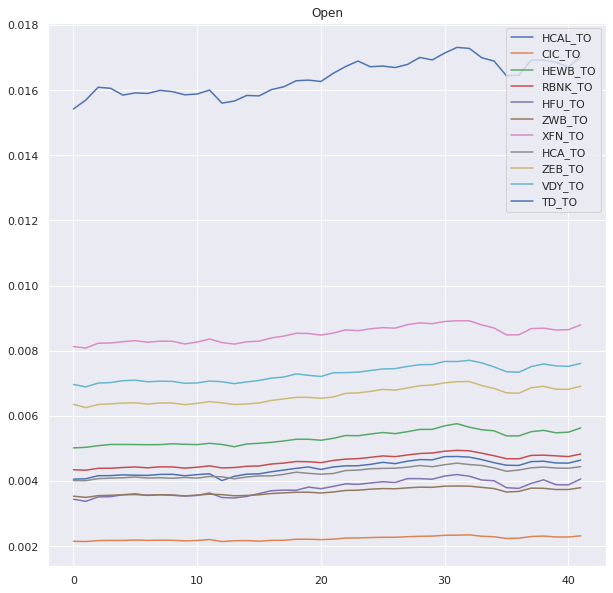

In [26]:
stocks = list(df_open_best_10.index)

stocks.append('TD_TO')

plot.rcParams.update({'figure.figsize': (10,10)})

df_open.plot.line(y=stocks, title="Open")

plot.show(block=True)

***
# 7. Modeling/Defining the Solution

Based on the analysis of the correlation generated with the "Open" variable, it is possible to assume that the combined correlations of all the variables used to generate the candlestick chart, can be useful to identify stocks with similar patterns during the same time frame.
<br>

## 7.1. Analyzing the correlations of the variables "Close", "High" and "Low"

## 7.1.1. Correlation using <bold><font color=red>"Close"</font></bold> values

In [27]:
df_close = pd.DataFrame()
column = 'Close'

for ticker_ in tqdm(tickers_sample):
    df_close[ticker_] = (df_clean.loc[df_clean['Ticker_Exchange'] == ticker_, column]).reset_index(drop=True)
    
df_close.head()

  0%|          | 0/8909 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



KeyboardInterrupt: ignored

In [ ]:
first_column = df_close.pop('TD_TO')
df_close.insert(0, 'TD_TO', first_column)
df_close.tail()

In [ ]:
df_close.drop(df_close.tail(1).index,inplace=True)
df_close.tail()

In [ ]:
df_close1 = df_close.dropna(axis=1)
df_close1.head()

In [ ]:
df_corr = df_close1.corr(method='pearson')
df_corr.head()

In [ ]:
df_corr_sorted = df_corr.sort_values(by='TD_TO', ascending=False)

df_close_best = df_corr_sorted.loc[df_corr_sorted['TD_TO'] < 1, 'TD_TO']

df_close_best_10 = df_close_best.head(10)

print(df_close_best_10)

### Plotting the 10 best correlated stocks

In [ ]:
stocks = list(df_close_best_10.index)
stocks.append('TD_TO')

df_open.plot.line(y=stocks, title="Close")

plot.show(block=True)

## 7.1.2. Correlation using <bold><font color=red>"High"</font></bold> values

In [ ]:
df_high = pd.DataFrame()
column = 'High'

for ticker_ in tqdm(tickers_sample):
    df_high[ticker_] = (df_clean.loc[df_clean['Ticker_Exchange'] == ticker_, column]).reset_index(drop=True)
    
df_high.head()

In [ ]:
first_column = df_high.pop('TD_TO')
df_high.insert(0, 'TD_TO', first_column)
df_high.tail()

In [ ]:
df_high.drop(df_high.tail(1).index,inplace=True)
df_high.tail()

In [ ]:
df_high1 = df_high.dropna(axis=1)
df_high1.head()

In [ ]:
df_corr = df_high1.corr(method='pearson')
df_corr.head()

In [ ]:
df_corr_sorted = df_corr.sort_values(by='TD_TO', ascending=False)

df_high_best = df_corr_sorted.loc[df_corr_sorted['TD_TO'] < 1, 'TD_TO']

df_high_best_10 = df_high_best.head(10)

print(df_high_best_10)

### Plotting the 10 best correlated stocks

In [ ]:
stocks = list(df_high_best_10.index)
stocks.append('TD_TO')

df_open.plot.line(y=stocks, title='High')

plot.show(block=True)

## 7.1.3. Correlation using <bold><font color=red>"Low"</font></bold> values </font>

In [ ]:
df_low = pd.DataFrame()
column = 'Low'

for ticker_ in tqdm(tickers_sample):
    df_low[ticker_] = (df_clean.loc[df_clean['Ticker_Exchange'] == ticker_, column]).reset_index(drop=True)
    
df_low.head()

In [ ]:
first_column = df_low.pop('TD_TO')
df_low.insert(0, 'TD_TO', first_column)
df_low.tail()

In [ ]:
df_low.drop(df_low.tail(1).index,inplace=True)
df_low.tail()

In [ ]:
df_low1 = df_low.dropna(axis=1)
df_low1.head()

In [ ]:
df_corr = df_low1.corr(method='pearson')
df_corr.head()

In [ ]:
df_corr_sorted = df_corr.sort_values(by='TD_TO', ascending=False)

df_low_best = df_corr_sorted.loc[df_corr_sorted['TD_TO'] < 1, 'TD_TO']

df_low_best_10 = df_low_best.head(10)

print(df_low_best_10)

### Plotting the 10 best correlated stocks

In [ ]:
stocks = list(df_low_best_10.index)
stocks.append('TD_TO')

df_open.plot.line(y=stocks, title='Low')

plot.show(block=True)

***
# 8. Evaluation

## 8.1. Finding the best combined correlation

In [ ]:
df_average = (df_open_best+df_close_best+df_high_best+df_low_best)/4

df_average_sorted = df_average.sort_values(axis=0, ascending=False).head(5)

df_average_sorted

In [ ]:
tickers = df_average_sorted.index

tickers = tickers.insert(0, 'TD_TO')

dtf_plot = dtf_period.set_index('Date')

## 8.2. Plotting the results

In [ ]:
import plotly.graph_objects as go

for ticker in tickers:
    df = dtf_plot[dtf_plot['Ticker_Exchange'] == ticker]
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                                         open=df['Open'],
                                         high=df['High'],
                                         low=df['Low'],
                                         close=df['Close'])])
    fig.update_layout(title='Candlestick Chart for ' + ticker,
                      xaxis_title='Date',
                      hovermode='x')
    fig.show()

### Desired Pattern - TD_TO:

<img src="newplot.png"/>

### 1st Place - HCAL_TO:

<img src="newplot-2.png"/>

### 2nd Place - HCA_TO:

<img src="newplot-3.png"/>

### 3rd Place - ZEB_TO:

<img src="newplot-4.png"/>

### 4th Place - HEWB_TO:

<img src="newplot-5.png"/>

### 5th Place - ZWB_TO:

<img src="newplot-6.png"/>